In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_actions = 10 # Because it's 10-armed so we have 10 possible actions to take at each step. 
n_steps = 10000
n_runs = 2000
epsilon = 0.1
alpha = 0.1
std_walk = 0.01

seed_value = 42
np.random.seed(seed_value)

def action_selection(q_estimates):
    if np.random.rand() < epsilon: 
        return np.random.choice(n_actions) 
    return np.argmax(q_estimates)

# Function to run the bandit problem for sample-average method
def bandit_sample_avg():
    rewards_at_step = np.zeros(n_steps)
    optimal_reward_at_step = np.zeros(n_steps)
    preferences = np.zeros(n_steps)

    for run in range(n_runs):
        q_true = np.zeros(n_actions)  # True action values
        q_estimates = np.zeros(n_actions)  # Estimated action values
        action_counts = np.zeros(n_actions)
        
        for step in range(n_steps):
            # Action selection using epsilon-greedy policy
            action = action_selection(q_estimates)

            # Receive reward
            reward = np.random.normal(q_true[action], 1)
            action_counts[action] += 1
            
            # Update estimate using sample average
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

            # Update true action values (random walk)
            q_true += np.random.normal(0, std_walk, n_actions)

            # Logging results
            rewards_at_step[step] += reward
            if action == np.argmax(q_true):
                optimal_reward_at_step[step] += 1

    return rewards_at_step / n_runs, optimal_reward_at_step / n_runs

# Function to run the bandit problem for constant-step-size method
def bandit_constant_step():
    avg_rewards = np.zeros(n_steps)
    optimal_action = np.zeros(n_steps)

    for run in range(n_runs):
        q_true = np.zeros(n_actions)  # True action values
        q_estimates = np.zeros(n_actions)  # Estimated action values
        action_counts = np.zeros(n_actions)

        for step in range(n_steps):
            # Action selection using epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = np.random.choice(n_actions)
            else:
                action = np.argmax(q_estimates)

            # Receive reward
            reward = np.random.normal(q_true[action], 1)
            action_counts[action] += 1

            # Update estimate using constant step size
            q_estimates[action] += alpha * (reward - q_estimates[action])

            # Update true action values (random walk)
            q_true += np.random.normal(0, std_walk, n_actions)

            # Logging results
            avg_rewards[step] += reward
            if action == np.argmax(q_true):
                optimal_action[step] += 1

    return avg_rewards / n_runs, optimal_action / n_runs

In [2]:
# Run simulations
sample_avg_rewards, sample_avg_optimal = bandit_sample_avg()

alpha = 0.1
constant_step_rewards, constant_step_optimal = bandit_constant_step(alpha)

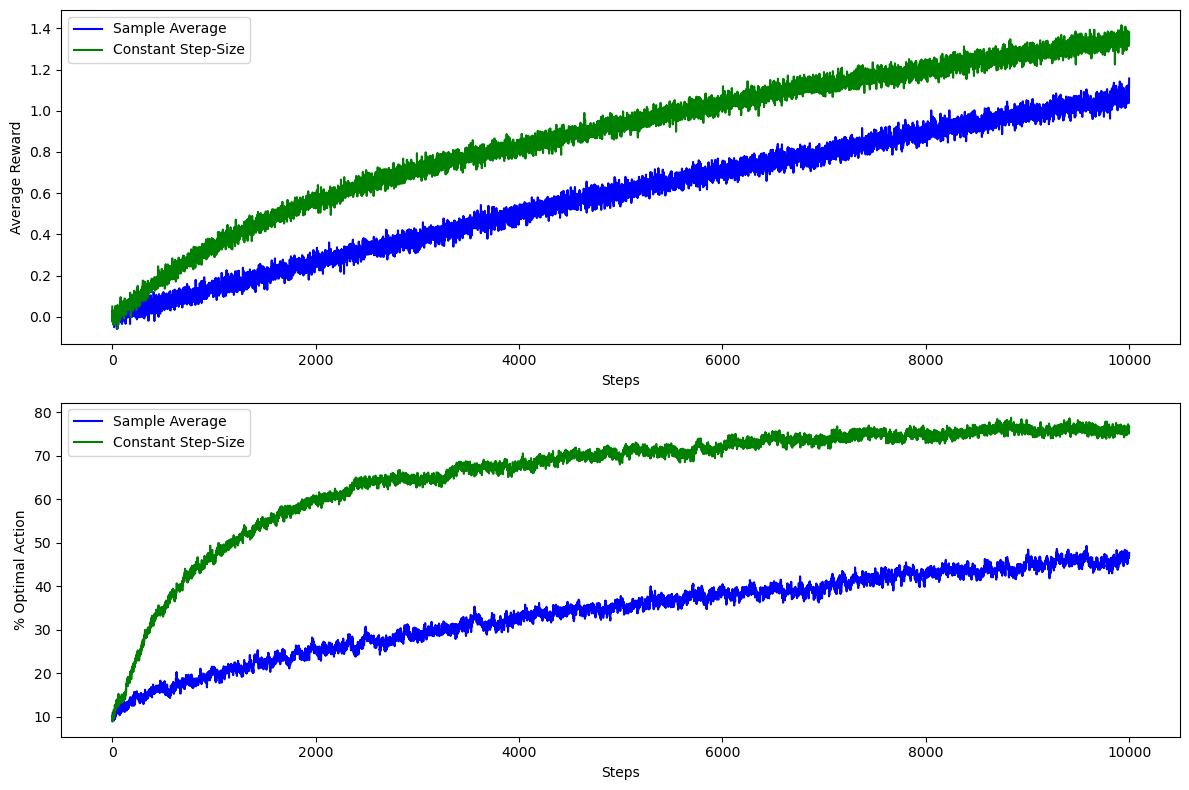

In [21]:
# Plotting the results
plt.figure(figsize=(12, 8))

# Average reward comparison
plt.subplot(2, 1, 1)
plt.plot(np.arange(1, n_steps + 1), sample_avg_rewards, label="Sample Average", color='blue')
plt.plot(np.arange(1, n_steps + 1), constant_step_rewards, label="Constant Step-Size", color='green')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()

# Optimal action comparison
plt.subplot(2, 1, 2)
plt.plot(np.arange(1, n_steps + 1), sample_avg_optimal * 100, label="Sample Average", color='blue')
plt.plot(np.arange(1, n_steps + 1), constant_step_optimal * 100, label="Constant Step-Size", color='green')
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.legend()

plt.tight_layout()
plt.show()